Nama :Wilson Jonathan 

NIM : 2201734606

# **No.1 Feature Engineering & Feature Selection**

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("dataset.csv")
data.describe()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,Unnamed: 44,Unnamed: 59,Unnamed: 65,Unnamed: 67,Unnamed: 68,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 80,Unnamed: 86,Unnamed: 87,Unnamed: 88,Unnamed: 89,Unnamed: 90
count,1.304900e+04,5.000000,6.000000,6.000000,6.000000,6.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,5.0,5.0,5.0,5.0,1.00
mean,3.119821e+07,12.080000,390.333333,0.500000,0.166667,0.166667,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65
std,9.484635e+06,17.509449,569.173670,1.224745,0.408248,0.408248,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,NaN
min,3.530300e+04,0.440000,2.000000,0.000000,0.000000,0.000000,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65
25%,2.593419e+07,2.960000,30.000000,0.000000,0.000000,0.000000,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65
50%,3.284523e+07,7.000000,30.000000,0.000000,0.000000,0.000000,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65
75%,3.926178e+07,7.000000,851.250000,0.000000,0.000000,0.000000,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65
max,4.328692e+07,43.000000,1125.000000,3.000000,1.000000,1.000000,80.0,6.0,10.0,8.0,6.0,8.0,6.0,NaN,5.0,0.0,5.0,0.0,0.65


In [6]:
data = data.drop(columns=['Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37',
       'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57',
       'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61',
       'Unnamed: 62', 'Unnamed: 63', 'Unnamed: 64', 'Unnamed: 65',
       'Unnamed: 66', 'Unnamed: 67', 'Unnamed: 68', 'Unnamed: 69',
       'Unnamed: 70', 'Unnamed: 71', 'Unnamed: 72', 'Unnamed: 73',
       'Unnamed: 74', 'Unnamed: 75', 'Unnamed: 76', 'Unnamed: 77',
       'Unnamed: 78', 'Unnamed: 79', 'Unnamed: 80', 'Unnamed: 81',
       'Unnamed: 82', 'Unnamed: 83', 'Unnamed: 84', 'Unnamed: 85',
       'Unnamed: 86', 'Unnamed: 87', 'Unnamed: 88', 'Unnamed: 89',
       'Unnamed: 90'])

In [7]:
data = data.dropna()

In [8]:
def is_float(x):
  try:
    float(x)
  except:
    return False
  return True

In [9]:
data['price'] = data['price'].str.replace(',', '')
data['price'] =data['price'].str.replace('$', '')
data['extra_people'] = data['extra_people'].str.replace(',', '')
data['extra_people'] =data['extra_people'].str.replace('$', '')
data['host_response_rate'] =data['host_response_rate'].str.replace('%', '')
data['host_acceptance_rate'] =data['host_acceptance_rate'].str.replace('%', '')

In [10]:
data[~data['price'].apply(is_float)].index

Int64Index([ 1160,  1173,  1174,  1924,  1926,  2041,  2086,  2364,  3402,
             3403,  3408,  3409,  3512,  3916,  3924,  4786,  4994,  5607,
             5661,  6550,  8047,  9094,  9560, 10759, 11268, 11704, 11705],
           dtype='int64')

In [11]:
data = data.drop([1160,  1173,  1174,  1924,  1926,  2041,  2086,  2364,  3402, 3403,  3408,  3409,  3512,  3916,  3924,  4786,  4994,  5607, 5661,  6550,  8047,  9094,  9560, 10759, 11268, 11704, 11705])

In [12]:
# picked feature
# data_picked = data.sample(12,axis=1)

In [13]:
# data_picked.columns
#data hasil random yang saya dapat adalah 'guests_included', 'host_listings_count', 'host_response_rate','neighbourhood_cleansed', 'neighbourhood', 'host_neighbourhood','minimum_minimum_nights', 'property_type', 'extra_people','minimum_nights', 'host_response_time', 'maximum_nights'

![title](data.png)

In [14]:
data_picked=data[['guests_included', 'host_listings_count', 'host_response_rate',
       'neighbourhood_cleansed', 'neighbourhood', 'host_neighbourhood',
       'minimum_minimum_nights', 'property_type', 'extra_people',
       'minimum_nights', 'host_response_time', 'maximum_nights']]

In [15]:
data_picked['host_neighbourhood'].value_counts().sort_values(ascending=False)

Shinjuku District      1500
Asakusa/Ueno           1149
Sumida District         708
Toshima District        705
Shibuya District        418
Ikebukuro               370
Shinjuku                330
Suginami District       297
Shibuya                 286
Nakano District         223
Setagaya District       206
Chūō District           199
Kita District           186
Minato District         169
Katsushika District     168
Itabashi District       155
Chiyoda District        152
Koto District           152
Arakawa District        150
Bunkyo District         145
Edogawa District        100
Shimokitazawa            95
Shinagawa District       86
Ota District             74
Tsukiji                  63
Akasaka                  62
Roppongi                 61
Adachi District          55
Meguro District          48
Ebisu/Daikanyama         42
Chūō-ku                  36
Nerima District          33
Island of Hawaiʻi        28
Aoyama                   11
Konohana-ku              10
Tsukishima          

In [16]:
stats=data_picked.groupby('host_neighbourhood')['host_neighbourhood'].agg('count').sort_values(ascending=False)
neighbour_less_100 = stats[stats<=100]
data_picked.host_neighbourhood = data_picked.host_neighbourhood.apply(lambda x: 'other' if x in neighbour_less_100 else x)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [17]:
cleansed_stats = data_picked['neighbourhood_cleansed'].value_counts().sort_values(ascending=False)
cleansed = cleansed_stats[cleansed_stats<=100]
data_picked.neighbourhood_cleansed = data_picked.neighbourhood_cleansed.apply(lambda x: 'other' if x in cleansed else x)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [18]:
data_picked['host_response_rate']= data_picked['host_response_rate'].astype(float)
data_picked['host_listings_count']= data_picked['host_listings_count'].astype(float)
data_picked['guests_included']= data_picked['guests_included'].astype(float)
data_picked['extra_people']= data_picked['extra_people'].astype(float)
data_picked['minimum_nights']= data_picked['minimum_nights'].astype(float)
data_picked['maximum_nights']= data_picked['maximum_nights'].astype(float)
data_picked['minimum_minimum_nights']= data_picked['minimum_minimum_nights'].astype(float)
data['review_scores_rating']=data['review_scores_rating'].astype(float)
data['price']=data['price'].astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [19]:
data_picked.describe()

,guests_included,host_listings_count,host_response_rate,minimum_minimum_nights,extra_people,minimum_nights,maximum_nights
count,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000,8550.000000
mean,2.475205,17.077778,98.275673,3.089591,1501.671579,3.345263,669.382339
std,1.957086,21.826674,6.495481,8.511223,1523.759825,8.858348,479.044758
min,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
25%,1.000000,4.000000,100.000000,1.000000,0.000000,1.000000,120.000000
50%,2.000000,9.000000,100.000000,1.000000,1500.000000,1.000000,1124.000000
75%,3.000000,22.000000,100.000000,2.000000,2080.000000,2.000000,1125.000000
max,20.000000,196.000000,100.000000,365.000000,30000.000000,365.000000,1125.000000


In [20]:
data['review_scores_rating'] = data['review_scores_rating'].apply(lambda x: 1 if x>=20 and x<40 else(2 if x>=40 and x<60 else(3 if x>=60 and x<80 else 4)))

In [21]:
feature=data_picked
target_1=data[['price']]
target_2=data[['review_scores_rating']]

In [22]:
todummy_list= ['host_response_time','host_neighbourhood','neighbourhood','neighbourhood_cleansed','property_type']

In [23]:
def dummy_data(data,todummy_list):
  for x in todummy_list:
    dummies = pd.get_dummies(data[x],prefix=x, dummy_na=False)
    data=data.drop(x,1)
    data=pd.concat([data,dummies],axis=1)
  return data

In [24]:
feature= dummy_data(feature, todummy_list)

In [25]:
feature

,guests_included,host_listings_count,host_response_rate,minimum_minimum_nights,extra_people,minimum_nights,maximum_nights,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_neighbourhood_Arakawa District,host_neighbourhood_Asakusa/Ueno,host_neighbourhood_Bunkyo District,host_neighbourhood_Chiyoda District,host_neighbourhood_Chūō District,host_neighbourhood_Ikebukuro,host_neighbourhood_Itabashi District,host_neighbourhood_Katsushika District,host_neighbourhood_Kita District,host_neighbourhood_Koto District,host_neighbourhood_Minato District,host_neighbourhood_Nakano District,host_neighbourhood_Setagaya District,host_neighbourhood_Shibuya,host_neighbourhood_Shibuya District,host_neighbourhood_Shinjuku,host_neighbourhood_Shinjuku District,host_neighbourhood_Suginami District,host_neighbourhood_Sumida District,host_neighbourhood_Toshima District,host_neighbourhood_other,neighbourhood_Adachi District,neighbourhood_Akasaka,neighbourhood_Akihabara,neighbourhood_Aoyama,neighbourhood_Arakawa District,neighbourhood_Asakusa/Ueno,neighbourhood_Bunkyo District,neighbourhood_Chiyoda District,...,neighbourhood_cleansed_Chiyoda Ku,neighbourhood_cleansed_Chuo Ku,neighbourhood_cleansed_Itabashi Ku,neighbourhood_cleansed_Katsushika Ku,neighbourhood_cleansed_Kita Ku,neighbourhood_cleansed_Koto Ku,neighbourhood_cleansed_Minato Ku,neighbourhood_cleansed_Nakano Ku,neighbourhood_cleansed_Setagaya Ku,neighbourhood_cleansed_Shibuya Ku,neighbourhood_cleansed_Shinjuku Ku,neighbourhood_cleansed_Suginami Ku,neighbourhood_cleansed_Sumida Ku,neighbourhood_cleansed_Taito Ku,neighbourhood_cleansed_Toshima Ku,neighbourhood_cleansed_other,property_type_Aparthotel,property_type_Apartment,property_type_Bed and breakfast,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Condominium,property_type_Cottage,property_type_Dome house,property_type_Dorm,property_type_Guest suite,property_type_Guesthouse,property_type_Hostel,property_type_Hotel,property_type_House,property_type_Hut,property_type_Loft,property_type_Ryokan (Japan),property_type_Serviced apartment,property_type_Tent,property_type_Tiny house,property_type_Townhouse,property_type_Villa
1,1.0,1.0,100.0,3.0,0.0,3.0,365.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,2.0,100.0,1.0,1070.0,28.0,180.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,3.0,100.0,28.0,0.0,28.0,720.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,2.0,100.0,1.0,1070.0,28.0,180.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1.0,3.0,100.0,28.0,550.0,28.0,720.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12889,6.0,16.0,100.0,2.0,1000.0,2.0,1125.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12916,5.0,16.0,100.0,2.0,1000.0,2.0,1125.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12932,4.0,16.0,100.0,2.0,1000.0,2.0,1125.0,0,0,0,1,0,0,0,

In [26]:
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures

def addInteraction(data):
  #feature name
  combos = list(combinations(list(data.columns),2))
  colnames = list(data.columns) + ['_'.join(x) for x in combos]

  #find interactions
  poly = PolynomialFeatures(interaction_only=True, include_bias=False)
  data = poly.fit_transform(data)
  data=pd.DataFrame(data)
  data.columns = colnames

  #remove interaction terms with all 0 values
  noint_indicies= [i for i, x in enumerate(list((data==0).all()))if x]
  data=data.drop(data.columns[noint_indicies],axis=1)

  return data

In [27]:
feature_default= feature
feature = addInteraction(feature)
feature.head()

,guests_included,host_listings_count,host_response_rate,minimum_minimum_nights,extra_people,minimum_nights,maximum_nights,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_neighbourhood_Arakawa District,host_neighbourhood_Asakusa/Ueno,host_neighbourhood_Bunkyo District,host_neighbourhood_Chiyoda District,host_neighbourhood_Chūō District,host_neighbourhood_Ikebukuro,host_neighbourhood_Itabashi District,host_neighbourhood_Katsushika District,host_neighbourhood_Kita District,host_neighbourhood_Koto District,host_neighbourhood_Minato District,host_neighbourhood_Nakano District,host_neighbourhood_Setagaya District,host_neighbourhood_Shibuya,host_neighbourhood_Shibuya District,host_neighbourhood_Shinjuku,host_neighbourhood_Shinjuku District,host_neighbourhood_Suginami District,host_neighbourhood_Sumida District,host_neighbourhood_Toshima District,host_neighbourhood_other,neighbourhood_Adachi District,neighbourhood_Akasaka,neighbourhood_Akihabara,neighbourhood_Aoyama,neighbourhood_Arakawa District,neighbourhood_Asakusa/Ueno,neighbourhood_Bunkyo District,neighbourhood_Chiyoda District,...,neighbourhood_cleansed_Taito Ku_property_type_Bed and breakfast,neighbourhood_cleansed_Taito Ku_property_type_Boutique hotel,neighbourhood_cleansed_Taito Ku_property_type_Condominium,neighbourhood_cleansed_Taito Ku_property_type_Dorm,neighbourhood_cleansed_Taito Ku_property_type_Guesthouse,neighbourhood_cleansed_Taito Ku_property_type_Hostel,neighbourhood_cleansed_Taito Ku_property_type_Hotel,neighbourhood_cleansed_Taito Ku_property_type_House,neighbourhood_cleansed_Taito Ku_property_type_Hut,neighbourhood_cleansed_Taito Ku_property_type_Ryokan (Japan),neighbourhood_cleansed_Taito Ku_property_type_Serviced apartment,neighbourhood_cleansed_Taito Ku_property_type_Villa,neighbourhood_cleansed_Toshima Ku_property_type_Aparthotel,neighbourhood_cleansed_Toshima Ku_property_type_Apartment,neighbourhood_cleansed_Toshima Ku_property_type_Boutique hotel,neighbourhood_cleansed_Toshima Ku_property_type_Condominium,neighbourhood_cleansed_Toshima Ku_property_type_Cottage,neighbourhood_cleansed_Toshima Ku_property_type_Guesthouse,neighbourhood_cleansed_Toshima Ku_property_type_Hostel,neighbourhood_cleansed_Toshima Ku_property_type_Hotel,neighbourhood_cleansed_Toshima Ku_property_type_House,neighbourhood_cleansed_Toshima Ku_property_type_Hut,neighbourhood_cleansed_Toshima Ku_property_type_Loft,neighbourhood_cleansed_Toshima Ku_property_type_Serviced apartment,neighbourhood_cleansed_Toshima Ku_property_type_Tiny house,neighbourhood_cleansed_Toshima Ku_property_type_Townhouse,neighbourhood_cleansed_Toshima Ku_property_type_Villa,neighbourhood_cleansed_other_property_type_Aparthotel,neighbourhood_cleansed_other_property_type_Apartment,neighbourhood_cleansed_other_property_type_Bed and breakfast,neighbourhood_cleansed_other_property_type_Boutique hotel,neighbourhood_cleansed_other_property_type_Condominium,neighbourhood_cleansed_other_property_type_Guesthouse,neighbourhood_cleansed_other_property_type_Hostel,neighbourhood_cleansed_other_property_type_House,neighbourhood_cleansed_other_property_type_Hut,neighbourhood_cleansed_other_property_type_Loft,neighbourhood_cleansed_other_property_type_Ryokan (Japan),neighbourhood_cleansed_other_property_type_Serviced apartment,neighbourhood_cleansed_other_property_type_Townhouse
0,1.0,1.0,100.0,3.0,0.0,3.0,365.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,100.0,1.0,1070.0,28.0,180.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [28]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
feature_pca = pd.DataFrame(pca.fit_transform(feature))
feature_pca

,0,1,2,3
0,-942880.022684,-81076.389667,-10213.687415,-27613.571122
1,-743740.608679,15031.009386,-17861.077472,-29252.021747
2,-942174.409850,-87908.297471,-7229.870939,8696.875308
3,-743740.608679,15031.009386,-17861.077472,-29252.021747
4,-543362.429446,-59003.301917,-12066.753857,8209.845015
...,...,...,...,...
8545,187736.915305,-68495.226276,-555.862804,31039.818806
8546,187734.034041,-68518.666652,-552.680136,31024.049321
8547,187731.136009,-68542.184734,-550.267088,31008.583211
8548,187725.896534,-68558.403246,-619.930242,30792.064902


In [29]:
X1_train,X1_test,y1_train,y1_test=train_test_split(feature_pca,target_1,test_size=0.2)
X2_train,X2_test,y2_train,y2_test=train_test_split(feature_pca,target_2,test_size=0.2)

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler().fit(X1_train)

X1_train = scaler.transform(X1_train)
X2_train = scaler.transform(X2_train)
X1_test = scaler.transform(X1_test)
X2_test = scaler.transform(X2_test)

Feature engineering yang saya lakukan dilakukan dengan bantuan library sklearn.preprocessing. Saya menghilangkan kolom yang tidak digunakan yaitu kolom unnamed 30 sampai 90 karena data tersebut terlalu banyak data kosong. Setelah itu, saya melakukan pengecekan terhadap data-data yang mengandung simbol aneh ataupun menyimpang dari data yang seharusnya kemudian saya hapus data tersebut. Setelah data sudah bersih dari data null, saya melakukan random untuk mendapat 12 feature random sesuai soal. Kemudian saya membuat dummies dari data kategorial. Setelah itu saya melakukan feature engineering dengan function yang sudah saya buat. Setelah itu saya melakukan dimensionality reduction dengan PCA karena data feature yang dihasilkan setelah dummy terlalu banyak. Saya melakukan PCA sehingga dihasilkan 4 features. Target untuk kasus no 3-5 adalah review_scores_rating dimana saya melakukan pengelompokkan/pengkategorian data karena akan dilakukan classification. Saya mengelompokkan review dengan rating 20-40 bernilai 1, 41-60 bernilai 2, 61-80 bernilai 3, 81-100 bernilai 4. Saya memulai dari 20 karena range data review_scores_rating adalah 20-100. Saya mengganggap tidak perlu untuk memulai data dari 0 karena data tersebut tidak ada. 

# **No 2. Logistic Regression**

In [30]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression().fit(X1_train,y1_train)
log_pred = log.predict(X1_test)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
print("Logistic regression")
print("Accuracy : {}".format(accuracy_score(y1_test,log_pred)*100))
print("MSE : {}".format(mean_squared_error(y1_test,log_pred)))
print("MSE : {}".format(r2_score(y1_test,log_pred)))

Logistic regression
Accuracy : 4.912280701754386
MSE : 5949026386.525731
MSE : -0.008413947868667337


Evaluation metric yang saya gunakan adalah mean squared error dan r2 score. Hasil yang saya dapat menghasilkan MSE yang cukup besar dan r2 score yang kurang baik. Dari feature engineering yang saya lakukan, saya menyimpulkan bahwa feature engineering yang saya lakukan kurang efektif. Sebelumnya saya mencoba memasukkan 12 features yang saya pilih dari data mentah ke model logistic regression. Hasil yang didapat dapat dibilang hampir sama dengan setelah saya lakukan feature engineering dan feature selection tersebut. Saya kurang mengerti mengapa hasil dari evalution metric kurang baik, namun saya mengasumsikan karena model yang digunakan kurang cocok untuk memprediksi data regression dimana logistic regression lebih banyak digunakan untuk binary classification. Selain itu, logistic regression juga kurang dapat bekerja dengan baik apabila data yang diberikan tidak cukup baik/penting untuk prediksi.

# **No.3 NearestNeighbors**

In [32]:
from sklearn.neighbors import KNeighborsClassifier

KNN = KNeighborsClassifier(n_neighbors=5).fit(X2_train,y2_train)
KNN_pred = KNN.predict(X2_test)
KNN_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([4, 4, 4, ..., 4, 4, 4])

In [33]:
print("KNN")
print("Accuracy : {}".format(accuracy_score(y2_test,KNN_pred)*100))

KNN
Accuracy : 94.97076023391813


Evaluation metric yang saya gunakan adalah accuracy_score. Akurasi yang didapat untuk model KNN ini cukup besar disekitar 95%. Feature engineering dan feature selection sangat berpengaruh pada KNN karena model ini tidak dapat bekerja dengan baik pada yang terlalu besar dan dimensi yang terlalu besar juga. Model ini juga sensitif terhadap data yang aneh dan banyak null.

# **No.4 SVM**

In [34]:
from sklearn.svm import SVC

SVM = SVC().fit(X2_train,y2_train)

SVM_pred = SVM.predict(X2_test)
SVM_pred

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([4, 4, 4, ..., 4, 4, 4])

In [35]:
print("SVM")
print("Accuracy : {}".format(accuracy_score(y2_test,SVM_pred)*100))

SVM
Accuracy : 95.2046783625731


Evaluation metric yang saya gunakan adalah accuracy_score. Akurasi yang didapat untuk model SVM ini cukup besar disekitar 96%. Feature engineering dan feature selection sangat berpengaruh pada SVM karena model ini sensitif terhadap data yang aneh dan banyak null.

# **No. 5 Decision Tree**

In [36]:
from sklearn.ensemble import RandomForestClassifier

tree = RandomForestClassifier().fit(X2_train,y2_train)

tree_pred = tree.predict(X2_test)
tree_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


array([4, 4, 4, ..., 4, 4, 4])

In [37]:
print("Tree")
print("Accuracy : {}".format(accuracy_score(y2_test,tree_pred)*100))

Tree
Accuracy : 95.14619883040936


Evaluation metric yang saya gunakan adalah accuracy_score. Saya memilih random forest tree karena model ini dapat beroperasi dengan baik. Akurasi yang didapat untuk model Random Forest Tree ini cukup besar disekitar 95%. Feature engineering dan feature selection membantu agar model ini dapat bekerja dengan baik meskipun model ini dapat bekerja dengan baik dengan data yang cukup besar ataupun dimensi yang cukup besar.

# **No. 6 Gaussian Mixture Model**

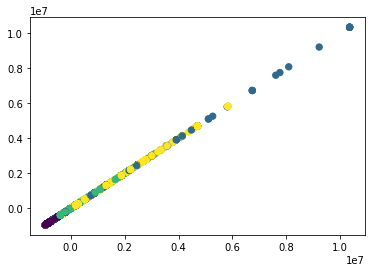

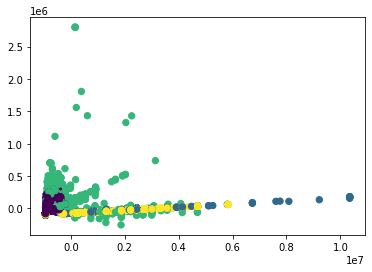

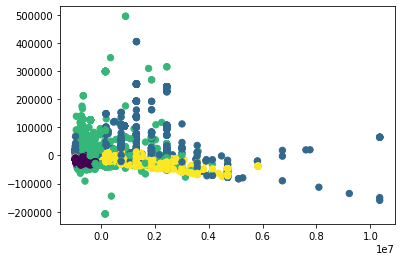

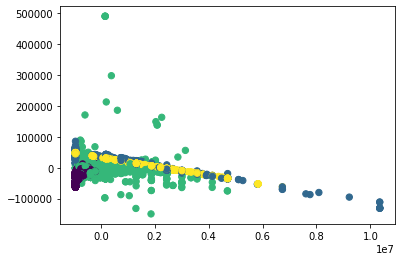

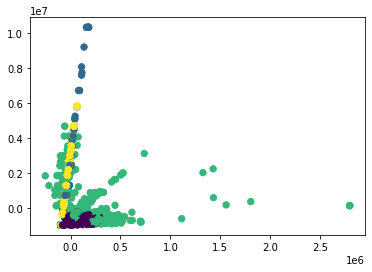

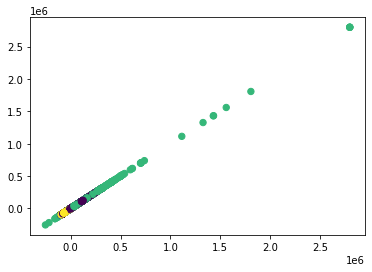

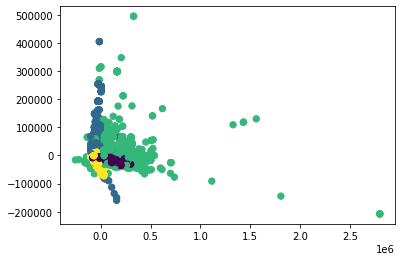

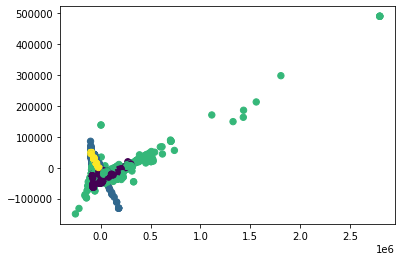

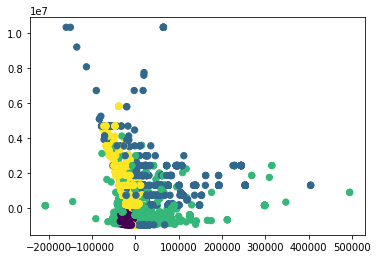

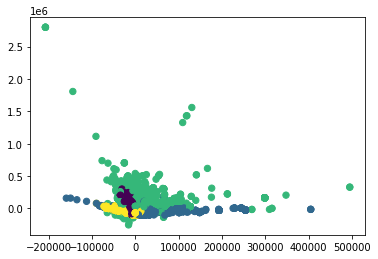

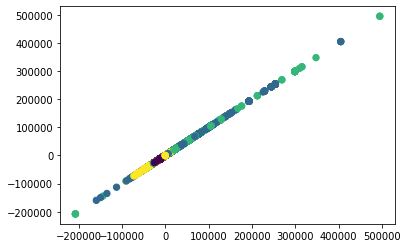

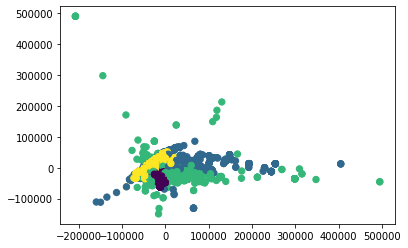

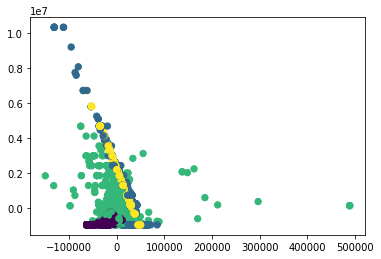

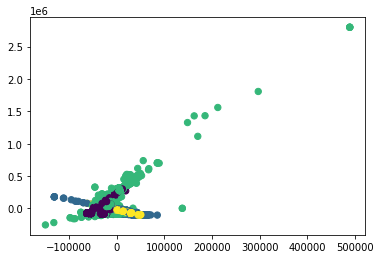

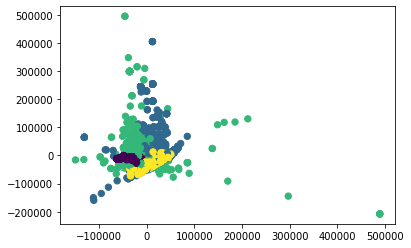

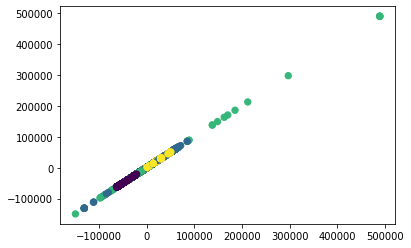

In [42]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=4).fit(feature_pca)
labels = gmm.predict(feature_pca)
# labels

for x in range(0,4):
  for y in range(0,4):
    plt.scatter(feature_pca[x], feature_pca[y], c = labels, s = 40, cmap = 'viridis')
    # plt.scatter(feature_pca[:, 0], feature_pca[:, 1], c=labels, s=40, cmap='viridis')
    plt.show()

Gaussian Mixture Model dapat membantu untuk menemukan feature dari data yang memiliki kesamaan karakteristik. Digunakan 4 fungsi Gaussian, karena n_components =4. Setiap Gaussian menjelaskan data yang terkandung dalam masing-masing dari empat cluster yang tersedia. Secara formal suatu mixture model berhubungan dengan distribusi campuran yang mewakili distribusi probabilitas pengamatan pada populasi keseluruhan. 

# **No. 7 K Means Clustering**

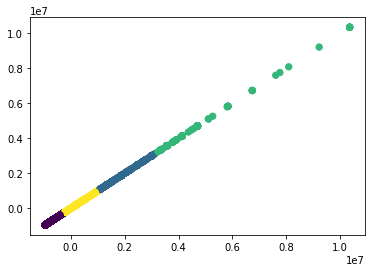

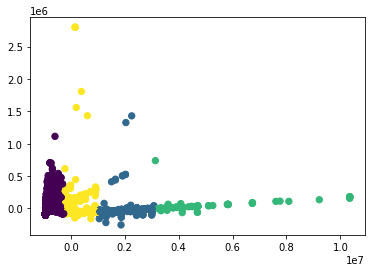

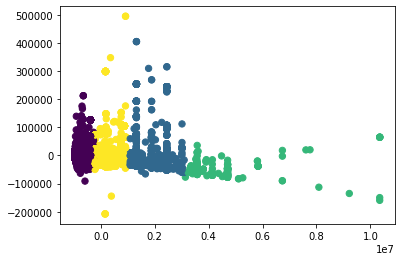

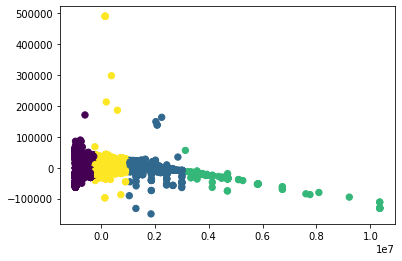

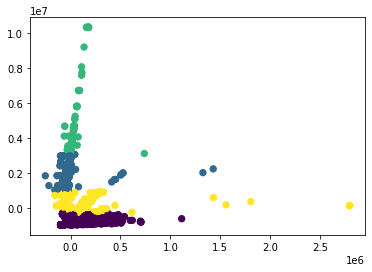

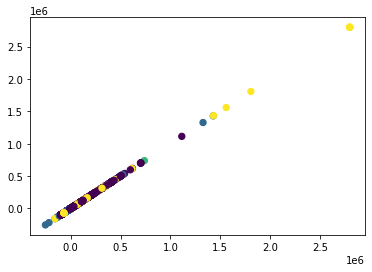

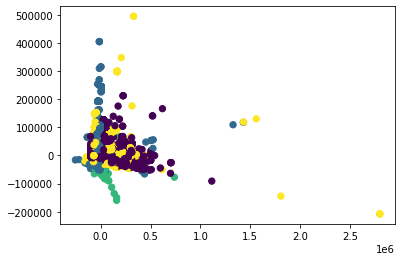

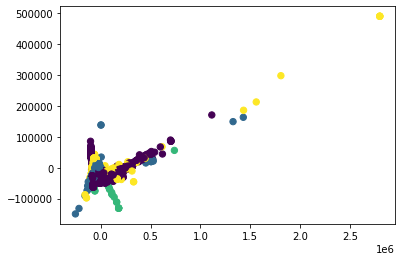

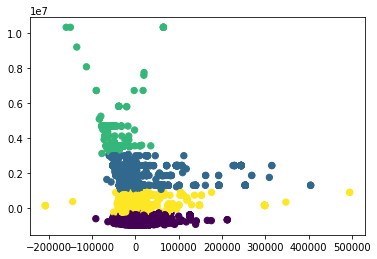

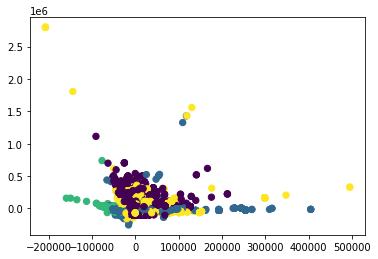

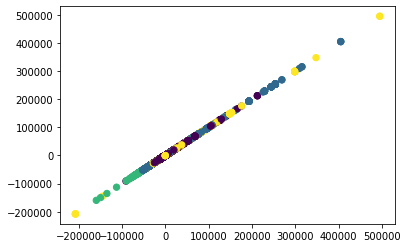

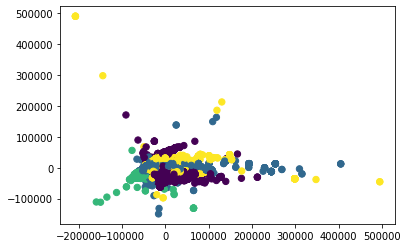

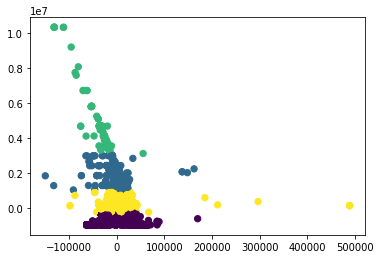

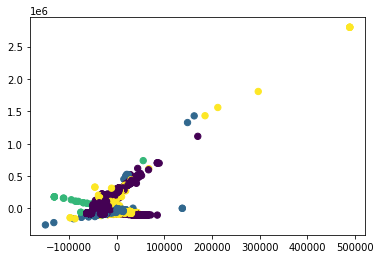

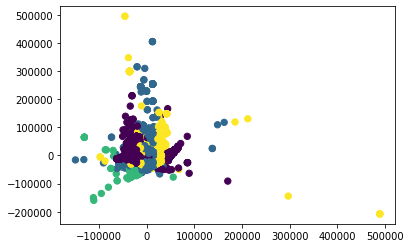

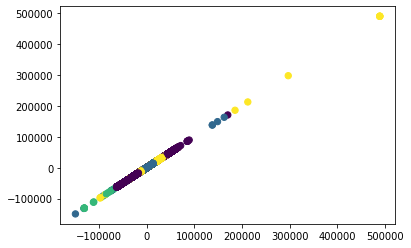

In [39]:
# Plot the data with K Means Labels
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit(feature_pca).predict(feature_pca)
for x in range(0,4):
  for y in range(0,4):
    plt.scatter(feature_pca[x], feature_pca[y], c = labels, s = 40, cmap = 'viridis')
    # plt.scatter(feature_pca[:, 0], feature_pca[:, 1], c=labels, s=40, cmap='viridis')
    
    plt.show()

Kmeans Clustering mengelompokkan data ke beberapa cluster. Cluster mengacu pada kumpulan titik data yang dikumpulkan bersama karena kesamaan tertentu.K-means dalam data mining dimulai dengan kelompok pertama centroid yang dipilih secara acak, yang digunakan sebagai titik awal untuk setiap cluster, dan kemudian melakukan perhitungan berulang (berulang) untuk mengoptimalkan posisi centroid. Kmeans membantu untuk mengelompokkan feature yang serupa bersama-sama dan menemukan suatu pola.